# <center> Machine Learning - Shahid Beheshti University, 2022 <center> 
### <center> Homework No.2 <center> 
    
<center> Seyyed Mohammad Soheil Mostafavi - 97222084<center>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import seaborn as sns
import seaborn as sn
import csv
from google.colab import files 
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import utils

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Part_1
---
#Mobile Price Dataset

In [106]:
from google.colab import drive
drive.mount('/content/drive/')
mobile_train = pd.read_csv('/content/drive/MyDrive/train_Mobile_Price_Classification.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [193]:
mobile_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [108]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [109]:
mobile_test = pd.read_csv('/content/drive/MyDrive/test_Mobile_Price_Classification.csv')

In [110]:
mobile_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [111]:
mobile_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

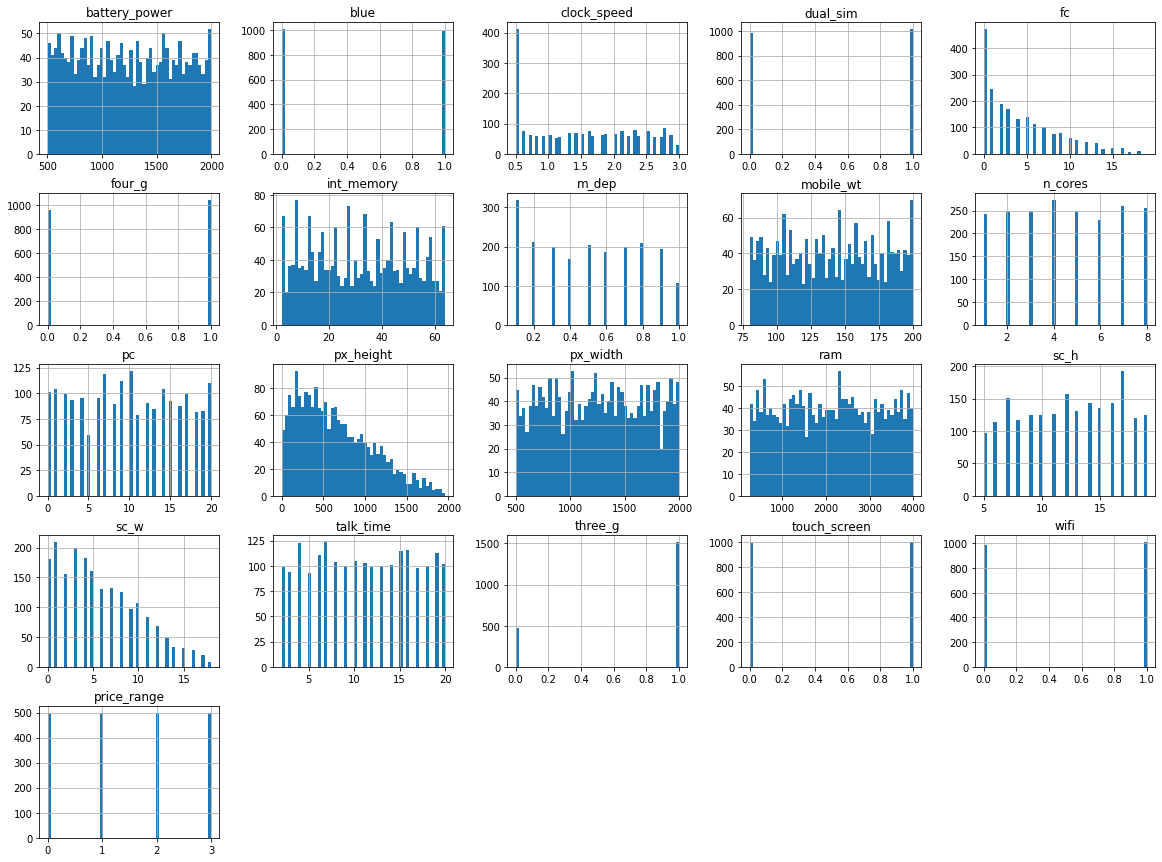

In [112]:
mobile_train.hist(bins=50, figsize=(20,15))
plt.show()

In [113]:
matrix = mobile_train.corr()
matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [114]:
sc = matrix['price_range'].copy()
sc

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

## Task 2

In [115]:
train_set, test_set = train_test_split(mobile_train, test_size = 0.2, random_state = 42)

In [116]:
x_train = train_set[['ram']].copy()
y_train = train_set[['price_range']].copy()

logistic_Regression = LogisticRegression()
logistic_Regression.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Text(42.0, 0.5, 'Truth')

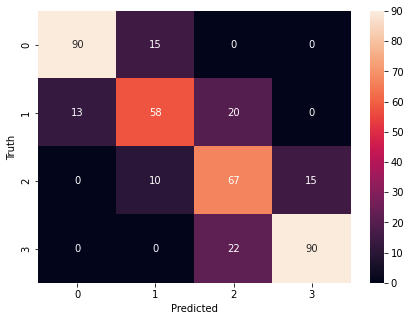

In [117]:
y_pred = logistic_Regression.predict(test_set[['ram']].copy())
cm = confusion_matrix(test_set[['price_range']].copy(), y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
print(classification_report(test_set[['price_range']].copy(), y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.70      0.64      0.67        91
           2       0.61      0.73      0.67        92
           3       0.86      0.80      0.83       112

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



## Task 3

In [119]:
mobile_train_pca = mobile_train.copy()

In [120]:
scaler=StandardScaler()
scaler.fit(mobile_train_pca)

StandardScaler()

In [121]:
scaled_data=scaler.transform(mobile_train_pca)
scaled_data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.00601811,
         0.98609664, -0.4472136 ],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.99401789,
        -1.01409939,  1.34164079],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.99401789,
         0.98609664, -1.34164079],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.99401789,
         0.98609664,  1.34164079]])

In [194]:
df = pd.DataFrame(scaled_data,columns=['0','battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
df

,0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,-1.341641
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,0.447214
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,1.341641
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,-1.341641


In [122]:
pca=PCA(n_components=2)

In [123]:
pca.fit(scaled_data)

PCA(n_components=2)

In [124]:
x_pca=pca.transform(scaled_data)

In [125]:
scaled_data.shape

(2000, 21)

In [126]:
x_pca.shape

(2000, 2)

In [127]:
scaled_data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.00601811,
         0.98609664, -0.4472136 ],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.99401789,
        -1.01409939,  0.4472136 ],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.99401789,
        -1.01409939,  1.34164079],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.99401789,
         0.98609664, -1.34164079],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.99401789,
         0.98609664,  1.34164079]])

In [128]:
x_pca

array([[-1.14133127,  0.15771691],
       [ 1.04401086, -1.92055625],
       [ 0.7519878 , -1.25882236],
       ...,
       [ 1.61839692, -1.20799485],
       [-1.70105081, -1.25940884],
       [ 1.70331809,  0.13346548]])

Text(0, 0.5, 'Second principle component')

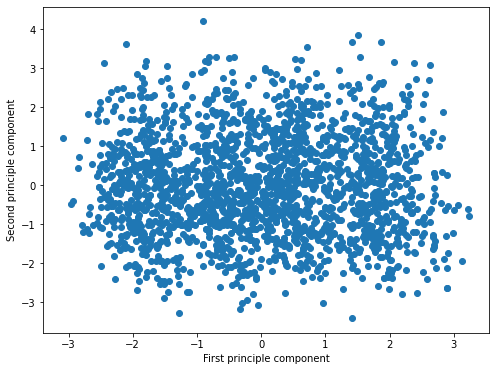

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Task 4

In [130]:
lab_enc = preprocessing.LabelEncoder()

df1 = lab_enc.fit_transform(x_pca[:,0])
df2 = lab_enc.fit_transform(x_pca[:,1])
df3 = lab_enc.fit_transform(scaled_data[:,20])

new_data = {'First principle component': df1,
        'Second principle component': df2,
        'Price Range': df3
        }

df_task4 = pd.DataFrame(new_data)
df_task4

,First principle component,Second principle component,Price Range
0,514,1138,1
1,1473,129,2
2,1371,346,2
3,1451,416,2
4,885,1773,1
...,...,...,...
1995,471,521,0
1996,1416,277,2
1997,1656,370,3
1998,307,345,0


In [131]:
df_train_set, df_test_set = train_test_split(df_task4, test_size = 0.2, random_state = 42)

In [132]:
x_train_task4 = df_train_set[['First principle component', 'Second principle component']].copy()
y_train_task4 = df_train_set[['Price Range']].copy()

logistic_Regression_task4 = LogisticRegression()
logistic_Regression_task4.fit(x_train_task4, y_train_task4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Text(42.0, 0.5, 'Truth')

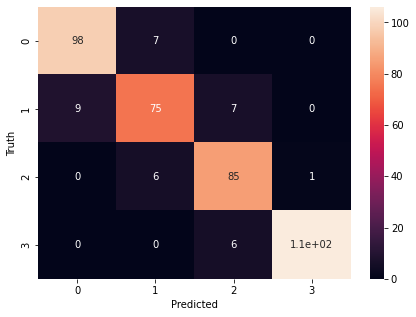

In [133]:
y_pred = logistic_Regression_task4.predict(df_test_set[['First principle component', 'Second principle component']].copy())
cm = confusion_matrix(df_test_set[['Price Range']].copy(), y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [134]:
print(classification_report(df_test_set[['Price Range']].copy(), y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       105
           1       0.85      0.82      0.84        91
           2       0.87      0.92      0.89        92
           3       0.99      0.95      0.97       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## Task 6-1

In [135]:
mobile_train_1 = mobile_train.copy()

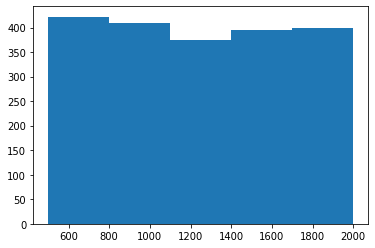

In [195]:
mbps = mobile_train['battery_power']
plt.hist(mbps, bins=5)
plt.show()

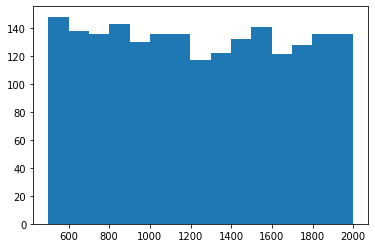

In [196]:
plt.hist(mbps, bins=15)
plt.show()

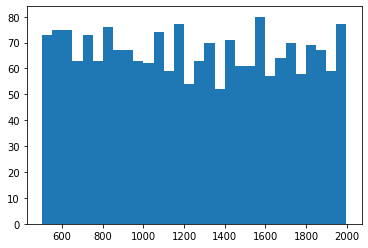

In [199]:
plt.hist(mbps, bins=30)
plt.show()

In [198]:
bins = [0, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels = [1,2,3,4,5,6,7,8]
mobile_train_1['binned'] = pd.cut(mobile_train['battery_power'], bins=bins, labels=labels)
mobile_train_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,binned
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,3
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,4
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,2
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,8
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,8
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,6


## Task 6-2

In [140]:

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df_dual_sim = pd.DataFrame(encoder.fit_transform(mobile_train[['dual_sim']]).toarray())
encoder_df_dual_sim

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1995,0.0,1.0
1996,0.0,1.0
1997,0.0,1.0
1998,1.0,0.0


In [141]:
encoder_df_blue = pd.DataFrame(encoder.fit_transform(mobile_train[['blue']]).toarray())
encoder_df_blue

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1995,0.0,1.0
1996,0.0,1.0
1997,1.0,0.0
1998,1.0,0.0


In [142]:
encoder_df_fc = pd.DataFrame(encoder.fit_transform(mobile_train[['fc']]).toarray())
encoder_df_fc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
encoder_df_four_g = pd.DataFrame(encoder.fit_transform(mobile_train[['four_g']]).toarray())
encoder_df_four_g

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1995,0.0,1.0
1996,1.0,0.0
1997,0.0,1.0
1998,0.0,1.0


In [144]:
mobile_train_2 = mobile_train.copy()
BBB1 = encoder_df_four_g
mobile_train_2 = mobile_train_2.join(BBB1)
mobile_train_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,0,1
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,1.0,0.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,0.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,1.0,0.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,0.0,1.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,1.0,0.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,0.0,1.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,0.0,1.0


## Task 6-3

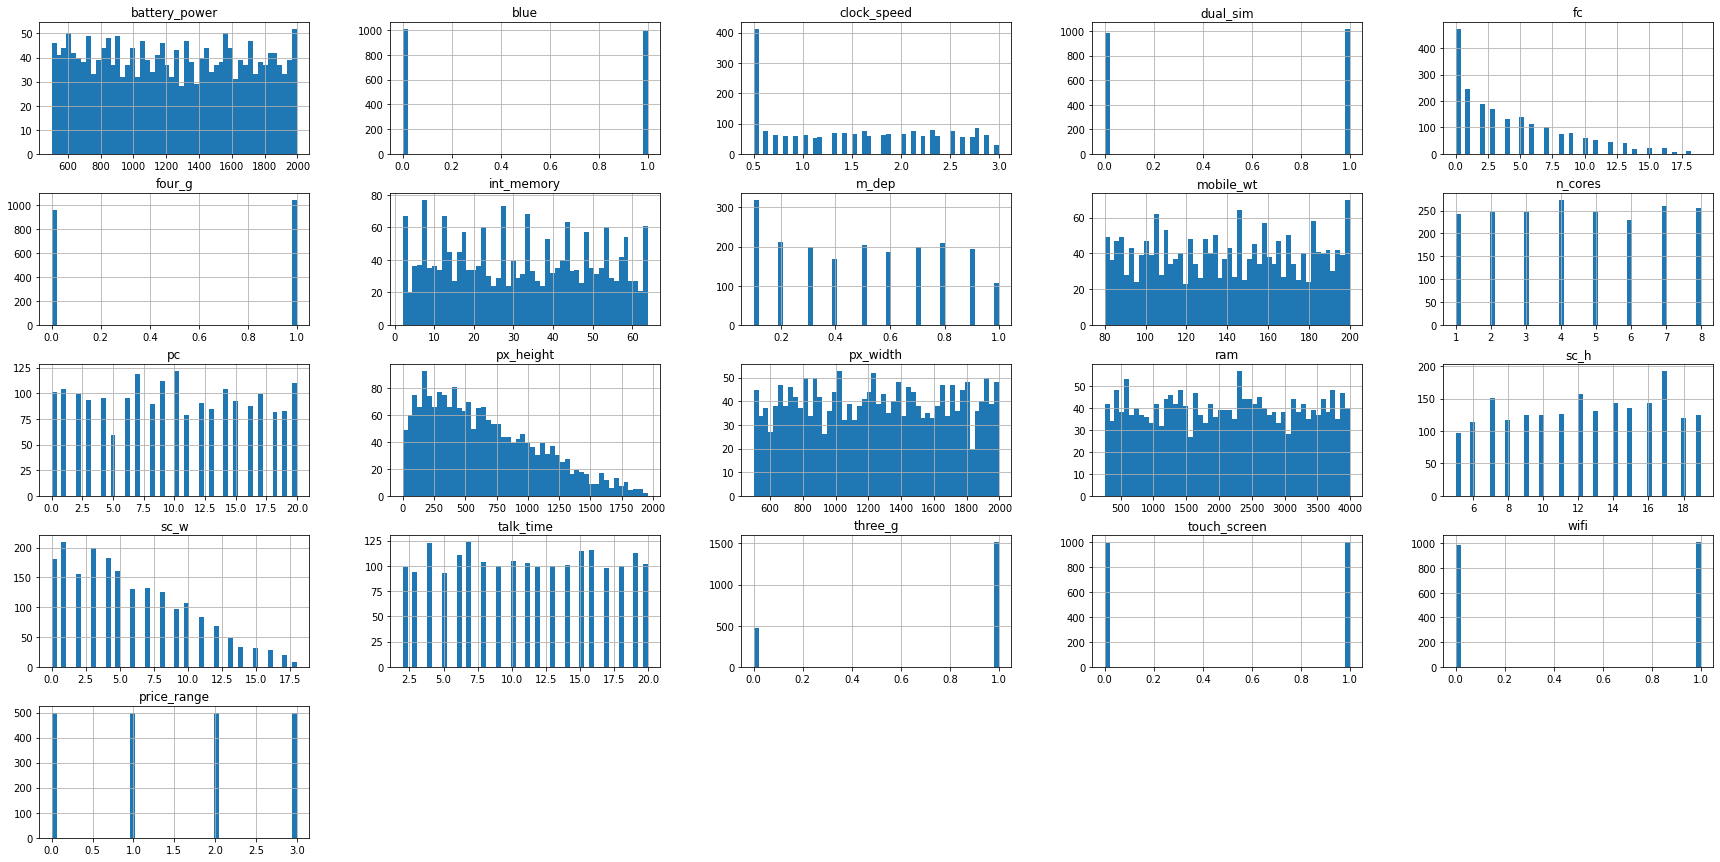

In [200]:
mobile_train.hist(bins=50, figsize=(30,15))
plt.show()

## Task 6-4

In [146]:
mobile_train_4 = mobile_train.copy()

mobile_train_4['volume cm'] = mobile_train['m_dep']*mobile_train['px_height']*mobile_train['px_width']*0.0264583333*0.0264583333
mobile_train_4['Area px'] = mobile_train['px_height']*mobile_train['px_width']
mobile_train_4[['m_dep', 'px_height', 'px_width', 'Area px', 'volume cm']]

,m_dep,px_height,px_width,Area px,volume cm
0,0.6,20,756,15120,6.350794
1,0.7,905,1988,1799140,881.633259
2,0.9,1263,1716,2167308,1365.488697
3,0.8,1216,1786,2171776,1216.269966
4,0.6,1208,1212,1464096,614.958446
...,...,...,...,...,...
1995,0.8,1222,1890,2309580,1293.444990
1996,0.2,915,1965,1797975,251.732107
1997,0.7,868,1632,1416576,694.165277
1998,0.1,336,670,225120,15.759377


## Task 7

In [147]:

SVM = SVC(kernel = 'linear', random_state = 0)

### Task 7-1

In [148]:
train_set_AAA, test_set_AAA = train_test_split(mobile_train_1, test_size = 0.2, random_state = 42)

In [149]:
SVM.fit(train_set_AAA.loc[:, train_set_AAA.columns != 'price_range'], train_set_AAA[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [150]:
SVM.score(test_set_AAA.loc[:, test_set_AAA.columns != 'price_range'], test_set_AAA[['price_range']])

0.9725

### Task 7-2

In [151]:
train_set_BBB, test_set_BBB = train_test_split(mobile_train_2, test_size = 0.2, random_state = 42)

In [152]:
SVM.fit(train_set_BBB.loc[:, train_set_BBB.columns != 'price_range'], train_set_BBB[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [153]:
SVM.score(test_set_BBB.loc[:, test_set_BBB.columns != 'price_range'], test_set_BBB[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9675

### Task 7-3

In [154]:
train_set_DDD, test_set_DDD = train_test_split(mobile_train_4, test_size = 0.95, random_state = 42)

In [155]:
SVM.fit(train_set_DDD.loc[:, train_set_DDD.columns != 'price_range'], train_set_DDD[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [156]:
SVM.score(test_set_DDD.loc[:, test_set_DDD.columns != 'price_range'], test_set_DDD[['price_range']])

0.8215789473684211

### Task 7-4

In [157]:
j1 = mobile_train_1['binned']
j2 = mobile_train_2[0]
j3 = mobile_train_2[1]
j4 = mobile_train_4['volume cm']
j5 = mobile_train_4['Area px']


mobile_train_data_ABD = mobile_train.copy()

mobile_train_data_ABD = mobile_train_data_ABD.join(j1)
mobile_train_data_ABD = mobile_train_data_ABD.join(j2)
mobile_train_data_ABD = mobile_train_data_ABD.join(j3)
mobile_train_data_ABD = mobile_train_data_ABD.join(j4)
mobile_train_data_ABD = mobile_train_data_ABD.join(j5)

train_set_ABD, test_set_ABD = train_test_split(mobile_train_data_ABD, test_size = 0.95, random_state = 42)

In [158]:
SVM.fit(train_set_ABD.loc[:, train_set_ABD.columns != 'price_range'], train_set_ABD[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [159]:
SVM.score(test_set_ABD.loc[:, test_set_ABD.columns != 'price_range'], test_set_ABD[['price_range']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8215789473684211

# Part_2
---
#Apartment rental offers in Germany Dataset

In [160]:
immo_data = pd.read_csv('/content/drive/MyDrive/immo_data.csv')

In [161]:
immo_data

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [162]:
immo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

## Task 1

In [163]:
regression_data = immo_data[['serviceCharge', 'heatingType', 'telekomUploadSpeed']].copy()

In [164]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       261941 non-null  float64
 1   heatingType         223994 non-null  object 
 2   telekomUploadSpeed  235492 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.2+ MB


In [165]:
regression_data['heatingType'].value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

In [166]:
heatingType_dict = {
    "central_heating": 1,
    "district_heating": 2,
    "gas_heating": 3,
    "self_contained_central_heating": 4,
    "floor_heating": 5,
    "oil_heating" : 6,
    "heat_pump" : 7,
    "combined_heat_and_power_plant" : 8,
    "night_storage_heater" : 9,
    "wood_pellet_heating" : 10,
    "electric_heating" : 11,
    "stove_heating" : 12,
    "solar_heating" : 13
}

regression_data['heatingType ID'] = regression_data['heatingType'].map(heatingType_dict)
regression_data

,serviceCharge,heatingType,telekomUploadSpeed,heatingType ID
0,245.00,central_heating,10.0,1.0
1,134.00,self_contained_central_heating,10.0,4.0
2,255.00,floor_heating,2.4,5.0
3,58.15,district_heating,40.0,2.0
4,138.00,self_contained_central_heating,NaN,4.0
...,...,...,...,...
268845,90.00,heat_pump,10.0,7.0
268846,220.00,gas_heating,NaN,3.0
268847,220.00,central_heating,40.0,1.0
268848,175.00,heat_pump,NaN,7.0


In [167]:
regression_data_dropped = regression_data.dropna()
regression_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193700 entries, 0 to 268847
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       193700 non-null  float64
 1   heatingType         193700 non-null  object 
 2   telekomUploadSpeed  193700 non-null  float64
 3   heatingType ID      193700 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.4+ MB


In [168]:
regression_data_dropped

,serviceCharge,heatingType,telekomUploadSpeed,heatingType ID
0,245.00,central_heating,10.0,1.0
1,134.00,self_contained_central_heating,10.0,4.0
2,255.00,floor_heating,2.4,5.0
3,58.15,district_heating,40.0,2.0
5,142.00,gas_heating,2.4,3.0
...,...,...,...,...
268841,98.00,central_heating,40.0,1.0
268843,120.00,central_heating,40.0,1.0
268844,80.00,gas_heating,2.4,3.0
268845,90.00,heat_pump,10.0,7.0


In [169]:
regression_data_final = regression_data_dropped[['serviceCharge', 'heatingType ID', 'telekomUploadSpeed']].copy()
regression_data_final

,serviceCharge,heatingType ID,telekomUploadSpeed
0,245.00,1.0,10.0
1,134.00,4.0,10.0
2,255.00,5.0,2.4
3,58.15,2.0,40.0
5,142.00,3.0,2.4
...,...,...,...
268841,98.00,1.0,40.0
268843,120.00,1.0,40.0
268844,80.00,3.0,2.4
268845,90.00,7.0,10.0


In [170]:
train_set, test_set = train_test_split(regression_data_final, test_size = 0.2, random_state = 42)

In [171]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154960 entries, 49433 to 169310
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       154960 non-null  float64
 1   heatingType ID      154960 non-null  float64
 2   telekomUploadSpeed  154960 non-null  float64
dtypes: float64(3)
memory usage: 4.7 MB


In [172]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38740 entries, 199971 to 190092
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   serviceCharge       38740 non-null  float64
 1   heatingType ID      38740 non-null  float64
 2   telekomUploadSpeed  38740 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [173]:
X = train_set[['telekomUploadSpeed']]
y = train_set[['heatingType ID']]

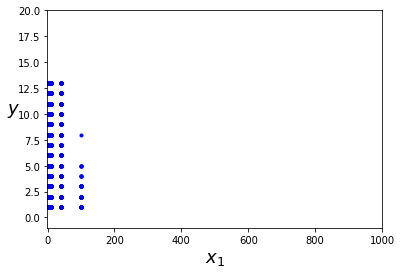

In [174]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1000, -1, 20])
plt.show()

In [175]:
X_b = np.c_[np.ones((154960 , 1)), X] 
linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [176]:
linear

array([[ 2.21898668e+00],
       [-1.52512372e-03]])

## Task 2

In [177]:
lin_reg = LinearRegression()
lin_reg.fit(train_set[['telekomUploadSpeed', 'heatingType ID']], train_set['serviceCharge'])
predictionsl = lin_reg.predict(test_set[['telekomUploadSpeed', 'heatingType ID']])
lin_mse = mean_squared_error(test_set['serviceCharge'], predictionsl)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

98.26924049184314

## Task 3

### ridge

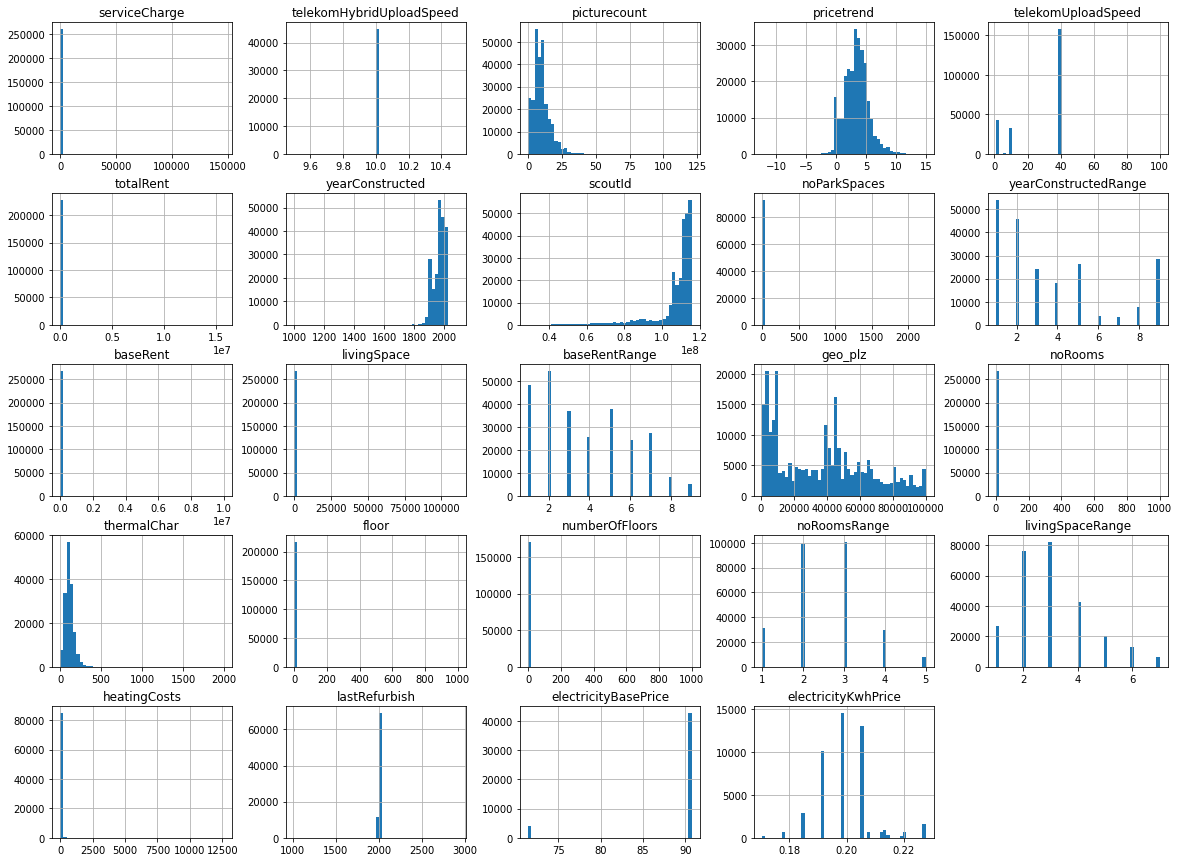

In [178]:
immo_data.hist(bins=50, figsize=(20,15))
plt.show()

In [179]:
Rcorr_matrix = immo_data.corr()
Rcr = Rcorr_matrix['serviceCharge'].copy()
Rcr

serviceCharge               1.000000
telekomHybridUploadSpeed         NaN
newlyConst                  0.047680
balcony                     0.060859
picturecount                0.061569
pricetrend                  0.063738
telekomUploadSpeed          0.010687
totalRent                   0.003954
yearConstructed             0.032162
scoutId                     0.015431
noParkSpaces                0.005239
hasKitchen                  0.039271
cellar                      0.019692
yearConstructedRange        0.064502
baseRent                    0.236240
livingSpace                 0.076134
lift                        0.074333
baseRentRange               0.170721
geo_plz                     0.038231
noRooms                     0.051044
thermalChar                -0.019583
floor                       0.002058
numberOfFloors              0.007053
noRoomsRange                0.135221
garden                      0.013835
livingSpaceRange            0.188643
heatingCosts                0.059051
l

In [180]:
regg = immo_data[['serviceCharge','baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend',
                  'geo_plz', 'thermalChar']].copy()

In [181]:
regg = regg.dropna()

In [182]:
train_set_reg, test_set_reg = train_test_split(regg, test_size = 0.2, random_state = 42)

In [183]:
from sklearn.linear_model import Ridge

In [184]:
clf = Ridge(alpha=1.0)

In [185]:
clf.fit(train_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], train_set_reg[['serviceCharge']])

Ridge()

In [186]:
clf.score(test_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], test_set_reg[['serviceCharge']])

0.004482556693194417

### lasso

In [187]:
from sklearn.linear_model import Lasso
laso = Lasso(alpha=1)

In [188]:
laso.fit(train_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], train_set_reg[['serviceCharge']])

Lasso(alpha=1)

In [189]:
laso.score(test_set_reg[['baseRentRange', 'livingSpaceRange', 'noRoomsRange','baseRent', 'picturecount','pricetrend','geo_plz']], test_set_reg[['serviceCharge']])

0.004479013929949427